# Heat Maps and Trees

Today we will be going over more ways to visualize your data. As usual, if you have any questions, feel free to ask!

Documentation continues to be your best friend:
* http://bokeh.pydata.org
* https://pygraphviz.github.io

### Installation

In [91]:
#!brew install graphviz
#!pip install pygraphviz --install-option="--include-path=/usr/local/include/graphviz/" \
#--install-option="--library-path=/usr/local/lib/graphviz"

### Import Statements

In [92]:
from datascience import *
from IPython.display import Image
from bokeh.charts import HeatMap, output_file, show
import pygraphviz as PG
import numpy as np
%matplotlib inline

### Reading in the data

In [35]:
tu38 = Table().read_table('TU 38 master - Sheet1.csv')
tu38

section,substance,utensil,number,quantity,measurement,position,material,offering,deity,Days,Month,MonthName,frequency tag,decorations,additional
1,barley beer,sappu,3,nan,nan,right offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,labku beer,sappu,4,nan,nan,right offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,barley beer,sappu,3,nan,nan,left offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,labku beer,sappu,1,nan,nan,left offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,nasu beer,sappu,1,nan,nan,left offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,zarbabu beer,sappu,1,nan,nan,left offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,milk,sappu,1,nan,nan,left offering table,alabaster,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,drawn wine,sappu,4,nan,nan,offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,barley beer,sappu,3,nan,nan,right offering table,gold,tardennu morning,Anu,365,12,nan,every day entire year,nan,nan
1,barley beer,sappu,3,nan,nan,right offering table,gold,rabu evening,Anu,365,12,nan,every day entire year,nan,nan


In [37]:
public = Table.read_table('pubschls.csv')
public

StatusType,County,District,School,Street,City,Zip,State,OpenDate,ClosedDate,Charter,FundingType,DOC,DOCType,SOC,SOCType,EdOpsName,EILName,GSoffered,Virtual,Magnet,Latitude,Longitude,LastUpdate
Active,Alameda,Alameda County Office of Education,nan,313 West Winton Avenue,Hayward,94544-1136,CA,nan,nan,nan,nan,0,County Office of Education (COE),nan,nan,nan,nan,nan,nan,nan,37.6582,-122.097,2/2/2017
Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,Oakland,94612-3355,CA,8/28/2006,nan,Y,Directly funded,0,County Office of Education (COE),66,High Schools (Public),Traditional,High School,9-12,N,N,37.8045,-122.268,6/18/2015
Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,Oakland,94606-4903,CA,8/22/2011,nan,Y,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),Traditional,Elementary,K-8,N,N,37.7846,-122.239,7/18/2016
Active,Alameda,Alameda County Office of Education,Yu Ming Charter,1086 Alcatraz Avenue,Oakland,94608-1265,CA,8/9/2011,nan,Y,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),Traditional,Elementary,K-8,N,N,37.8474,-122.284,5/10/2016
Active,Alameda,Alameda County Office of Education,Urban Montessori Charter,5328 Brann Street,Oakland,94619-3312,CA,8/27/2012,nan,Y,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),Traditional,Elementary,K-8,N,N,37.7784,-122.189,10/9/2015
Active,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,2500 Fairmont Avenue,San Leandro,94578-1005,CA,7/1/1980,nan,N,nan,0,County Office of Education (COE),14,Juvenile Court Schools,Juvenile Court School,High School,K-12,N,N,37.7129,-122.112,11/10/2016
Active,Alameda,Alameda County Office of Education,Alameda County Community,313 West Winton Avenue,Hayward,94544-1136,CA,7/1/1980,nan,N,nan,0,County Office of Education (COE),10,County Community,County Community School,High School,K-12,C,N,37.6582,-122.097,12/7/2016
Active,Alameda,Alameda County Office of Education,Oakland Unity Middle,7200 Bancroft Avenue # 261,Oakland,94605-2403,CA,8/23/2015,nan,Y,Directly funded,0,County Office of Education (COE),62,Intermediate/Middle Schools (Public),Traditional,Intermediate/Middle/Junior High,6-8,N,N,37.7676,-122.178,8/17/2016
Active,Alameda,Alameda County Office of Education,Cox Academy,9860 Sunnyside Street,Oakland,94603-2750,CA,7/1/1980,nan,Y,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),Traditional,Elementary,P-5,N,N,37.7465,-122.162,8/23/2016
Active,Alameda,Alameda County Office of Education,Lazear Charter Academy,824 29th Avenue,Oakland,94601-2205,CA,7/1/1980,nan,Y,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),Traditional,Elementary,K-8,N,N,37.7762,-122.232,8/23/2016


In [76]:
graffiti = Table.read_table('Graffiti.csv')
graffiti

Temple,Code,Location,Width,Dimensions,Description
E,E1,West wall of a wall located at the NE corner of the pyra ...,7.2 cm,1.5 mm,Fish head with appendages projecting from the mouth. The ...
E,E2,"North surface of the second column (from East to West), ...",18.5 cm,19 cm,Rhombic design with volutes at vertices; Inside you can ...
E,E3,"Ur s surface of the second column (from East to West), o ...",18.5 cm,46.5 cm,"Three stylized human faces, one of which wears a simple ..."
D,D1,"South surface of a column painted white, in the lateral ...",33 cm,115 cm,"Stylized character, ornithomorphic motif and other like ..."
D,D2,"West surface painted red of a column, in the lateral sec ...",36 cm,92 cm,Character surrounded by a set of lines (Fig. 13B)
D,D3,"North facing north of enclosure 8, in the Patio Cereal, ...",10.5 cm,"15,5 cm",Character with headdress profile looking west. The body ...
D,D4,"North facing of the enclosure 8, in the Ceremonial Court ...",9 cm,20.5 cm,"Four separate motifs: a trophy head facing east, which s ..."
D,D5,"South facing interior of Campus 5, southwestern sector o ...",3.7 cm,6 cm,"Incomplete profile head, with headdress and earmuff, fac ..."
D,D6,"South facing of Campus 5, southwestern sector of the Upp ...",2.5 cm,2.5 cm,In-complete human face (Fig. 17B)
D,D7,"South facing interior of Campus 5, southwestern sector o ...",7.5 cm,13 cm,Undetermined reason (Fig. 17C)


### Heat Maps

Per Wikipedia: "A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors." They are great tools for visualizing the relationship between two variables, and can be applied to large sets of data easily. In order to create one, we need to find two variables that we want to compare, and come up with some metric to quantify their relationship. In the case of this first dataset, we are going to look at the relationship between deities / groups of deities and the substances that they're offered. We will use the frequency of their appearance together as our way to color the chart.

In [93]:
# grouping the data by SUBSTANCE and DEITY
groupeded = tu38.group(['substance', 'deity'])

# converting to a pandas dataframe
groupeded = groupeded.to_df()
groupeded

,substance,deity,count
0,Dilmun dates,"Anu, Antu and other gods",1
1,Izallu wine,Anu,1
2,barley beer,Antu,2
3,barley beer,Anu,9
4,barley flour,"Anu, Antu, Ishtar, Nanaya, other gods",1
5,choice dates,"Anu, Antu and other gods",1
6,date cakes,nan,10
7,drawn wine,Anu,5
8,emmer flour,"Anu, Antu, Ishtar, Nanaya, other gods",1
9,kubbusu cakes,king,1


In [44]:
# making a bokeh heatmap from the df GROUPEDED
hm = HeatMap(groupeded, x='substance', y='deity', values='count',
             title='Substance x Deity', stat=None)

output_file('tu38_heatmap.html')
show(hm)

What we just did is very similar to a pivot table, but using colors to display intensity instead of numbers.

In [39]:
# this pivot table is similar in representation to what the above heat map represents
pivoted = tu38.pivot('deity', 'substance')
data = pivoted.to_df()

w_index = data.set_index('substance')
w_index

,Antu,Anu,Anu,Anu and Antu,Anu and Anut,"Anu, Antu and other gods","Anu, Antu, Ishtar, Nanaya, other gods",Ishtar,Nanaya,king,nan,other gods
substance,,,,,,,,,,,,
Dilmun dates,0,0,0,0,0,1,0,0,0,0,0,0
Izallu wine,0,1,0,0,0,0,0,0,0,0,0,0
barley beer,2,9,0,0,0,0,0,0,0,0,0,0
barley flour,0,0,0,0,0,0,1,0,0,0,0,0
choice dates,0,0,0,0,0,1,0,0,0,0,0,0
date cakes,0,0,0,0,0,0,0,0,0,0,10,0
drawn wine,0,5,0,0,0,0,0,0,0,0,0,0
emmer flour,0,0,0,0,0,0,1,0,0,0,0,0
kubbusu cakes,0,0,0,0,0,0,0,0,0,1,0,0


Next we are going to use public school data. We are going to visualize the relationship between counties and funding types, and quantify the relationship with their average DOC (meaning?).

In [69]:
# grouping PUBLIC by COUNTY and FUNDINGTYPE, and using np.mean to calculate 
# the average of all columns for that group
public_grouped = public.group(['County', 'FundingType'], np.mean).to_df()
public_grouped

,County,FundingType,StatusType mean,District mean,School mean,Street mean,City mean,Zip mean,State mean,OpenDate mean,...,SOC mean,SOCType mean,EdOpsName mean,EILName mean,GSoffered mean,Virtual mean,Magnet mean,Latitude mean,Longitude mean,LastUpdate mean
0,Alameda,Directly funded,,,,,,,,,...,62.960526,,,,,,,NaN,NaN,
1,Alameda,Locally funded,,,,,,,,,...,64.333333,,,,,,,NaN,NaN,
2,Alameda,nan,,,,,,,,,...,NaN,,,,,,,NaN,NaN,
3,Alpine,nan,,,,,,,,,...,NaN,,,,,,,NaN,NaN,
4,Amador,Locally funded,,,,,,,,,...,62.000000,,,,,,,38.483322,-120.834920,
5,Amador,nan,,,,,,,,,...,NaN,,,,,,,NaN,NaN,
6,Butte,Directly funded,,,,,,,,,...,62.294118,,,,,,,NaN,NaN,
7,Butte,Locally funded,,,,,,,,,...,65.800000,,,,,,,NaN,NaN,
8,Butte,nan,,,,,,,,,...,NaN,,,,,,,NaN,NaN,
9,Calaveras,Locally funded,,,,,,,,,...,65.000000,,,,,,,38.188474,-120.690930,


In [72]:
# heat map that uses the average DOC for its color saturation
hm = HeatMap(public_grouped, x='County', y='FundingType', values='DOC mean',
             title='County x Funding Type', stat=None)

output_file('school_heatmap.html')
show(hm)

### Trees

Sometimes it is helpful to put your data in a tree structure to represent relationships. To quote Wikipedia, "A tree structure or tree diagram is a way of representing the hierarchical nature of a structure in a graphical form." We will start with a simple example, then move onto a multi-layered tree.

In [89]:
# selecting columns that will represent the relationship
# that we want to display
graffiti_sub = graffiti.select('Temple', 'Code')

#picking out a single temple to show the tree of
temple_d = graffiti_sub.where('Temple', 'D')
temple_d

Temple,Code
D,D1
D,D2
D,D3
D,D4
D,D5
D,D6
D,D7
D,D8
D,D9
D,D10


/Users/ronaldwalker/anaconda/lib/python3.5/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


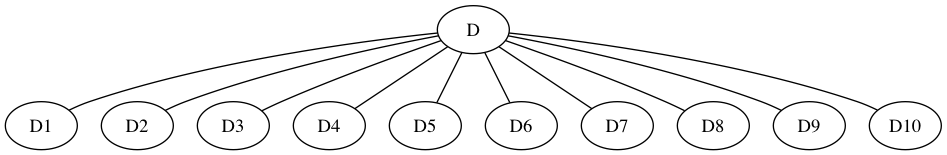

In [90]:
# initializing a pygraphviz tree object
B = PG.AGraph()

# we are going to iterate through each row to add the pairs to the tree
row = 0
while row < temple_d.num_rows:
    count = 0
    while count < temple_d.num_columns-1:
        temp_d.apply((lambda x,y: B.add_edge(x, y)), [count,count+1])
        count += 1
    row+=1

    
# save the graph in dot format
B.write('ademo.dot')

# pygraphviz renders graphs in neato by default, 
# so you need to specify dot as the layout engine
B.layout(prog='dot')

# creating a png
B.draw('file.png')

# displaying that png
Image('file.png')

The above graph is a simple example of the kind of structure that we can implement. The relationship on display is that there is a temple (D), and that temple is the common factor for each of the branches. As we get more complicated and have overlapping edges and nodes, we will have to get more creative about how we construct the trees.

In [40]:
# selecting out features that we care about for our tree
slct = tu38.select('deity', 'position', 'utensil', 'substance')
slct

deity,position,utensil,substance
Anu,right offering table,sappu,barley beer
Anu,right offering table,sappu,labku beer
Anu,left offering table,sappu,barley beer
Anu,left offering table,sappu,labku beer
Anu,left offering table,sappu,nasu beer
Anu,left offering table,sappu,zarbabu beer
Anu,left offering table,sappu,milk
Anu,offering table,sappu,drawn wine
Anu,right offering table,sappu,barley beer
Anu,right offering table,sappu,barley beer


In [23]:
# we are going to make a tree for just Anu, so we subset the table
anu = slct.where('deity', 'Anu')
anu

deity,position,utensil,substance
Anu,right offering table,sappu,barley beer
Anu,right offering table,sappu,labku beer
Anu,left offering table,sappu,barley beer
Anu,left offering table,sappu,labku beer
Anu,left offering table,sappu,nasu beer
Anu,left offering table,sappu,zarbabu beer
Anu,left offering table,sappu,milk
Anu,offering table,sappu,drawn wine
Anu,right offering table,sappu,barley beer
Anu,right offering table,sappu,barley beer


In [24]:
# we are going to create id's for each of the values, like we did with networks,
# but instead of numbers, we are going to use permutations of the tree sequences
permutations = anu.group(['deity', 'position', 'utensil', 'substance']).drop('count')
original = permutations.copy()

count = 0
while count < permutations.num_columns-1:
    changed = permutations.apply((lambda x,y: x + ' ' + y), [count,count+1])
    count += 1
    permutations[permutations.labels[count]] = changed
permutations

/Users/ronaldwalker/anaconda/lib/python3.5/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


deity,position,utensil,substance
Anu,Anu cella,Anu cella sappu,Anu cella sappu Izallu wine
Anu,Anu cella,Anu cella sappu,Anu cella sappu barley beer
Anu,Anu cella,Anu cella sappu,Anu cella sappu drawn wine
Anu,Anu cella,Anu cella sappu,Anu cella sappu labku beer
Anu,Anu cella,Anu cella sappu,Anu cella sappu milk
Anu,Anu cella,Anu cella sappu,Anu cella sappu nasu beer
Anu,Anu left offering table,Anu left offering table sappu,Anu left offering table sappu barley beer
Anu,Anu left offering table,Anu left offering table sappu,Anu left offering table sappu labku beer
Anu,Anu left offering table,Anu left offering table sappu,Anu left offering table sappu milk
Anu,Anu left offering table,Anu left offering table sappu,Anu left offering table sappu nasu beer


In [34]:
# creating a dictionary where we will map the permutations to their original values
label_dictionary = {}

for row in range(original.num_rows):
    graph_row = original.take(row)
    key_row = permutations.take(row)
    for i in range(original.num_columns):
        label_dictionary[key_row.get(i)[0]] = graph_row.get(i)[0]
label_dictionary

{'Anu': 'Anu',
 'Anu cella': 'cella',
 'Anu cella sappu': 'sappu',
 'Anu cella sappu Izallu wine': 'Izallu wine',
 'Anu cella sappu barley beer': 'barley beer',
 'Anu cella sappu drawn wine': 'drawn wine',
 'Anu cella sappu labku beer': 'labku beer',
 'Anu cella sappu milk': 'milk',
 'Anu cella sappu nasu beer': 'nasu beer',
 'Anu left offering table': 'left offering table',
 'Anu left offering table sappu': 'sappu',
 'Anu left offering table sappu barley beer': 'barley beer',
 'Anu left offering table sappu labku beer': 'labku beer',
 'Anu left offering table sappu milk': 'milk',
 'Anu left offering table sappu nasu beer': 'nasu beer',
 'Anu left offering table sappu zarbabu beer': 'zarbabu beer',
 'Anu offering table': 'offering table',
 'Anu offering table nan': 'nan',
 'Anu offering table nan sibtu loaf': 'sibtu loaf',
 'Anu offering table sappu': 'sappu',
 'Anu offering table sappu drawn wine': 'drawn wine',
 'Anu offering table sappu nan': 'nan',
 'Anu right offering table': 'rig

/Users/ronaldwalker/anaconda/lib/python3.5/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


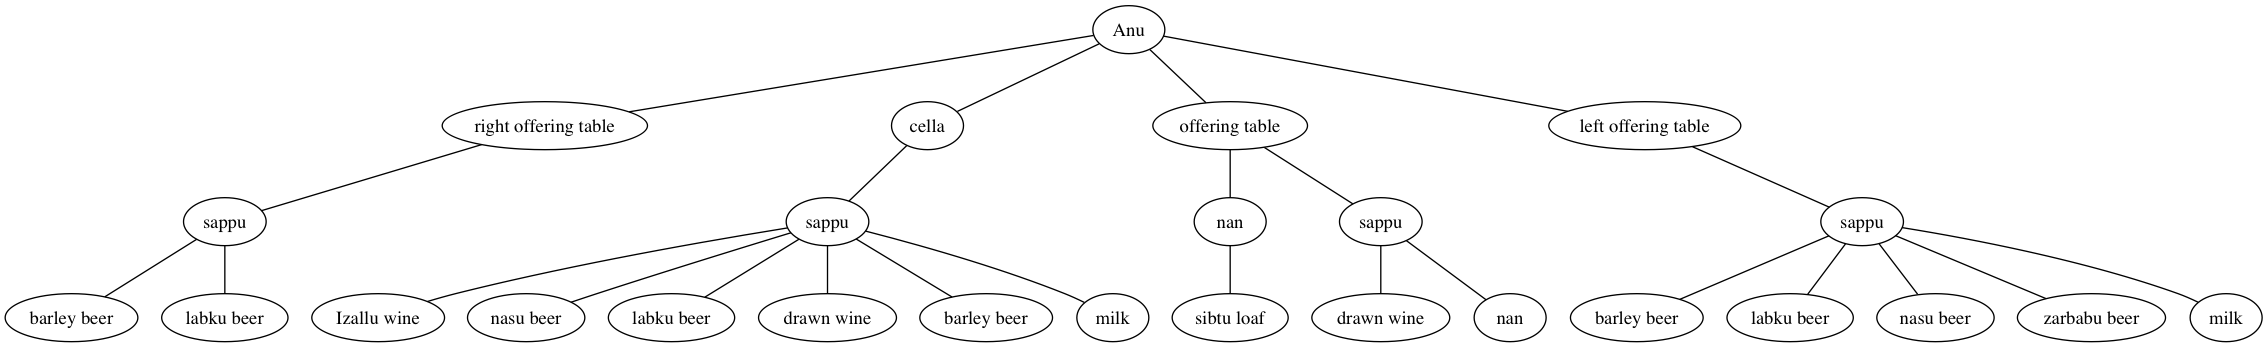

In [32]:
# initializing the tree
B = PG.AGraph()

# creating all of the nodes
for x in label_dictionary.keys():
    B.add_node(x, label=label_dictionary[x])

# connecting the nodes with the proper edges
count = 0
while count < permutations.num_columns-1:
    permutations.apply((lambda x,y: B.add_edge(x, y)), [count,count+1])
    count += 1
    
B.write('ademo.dot')
B.layout(prog='dot')
B.draw('file.png')
Image('file.png')

/Users/ronaldwalker/anaconda/lib/python3.5/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


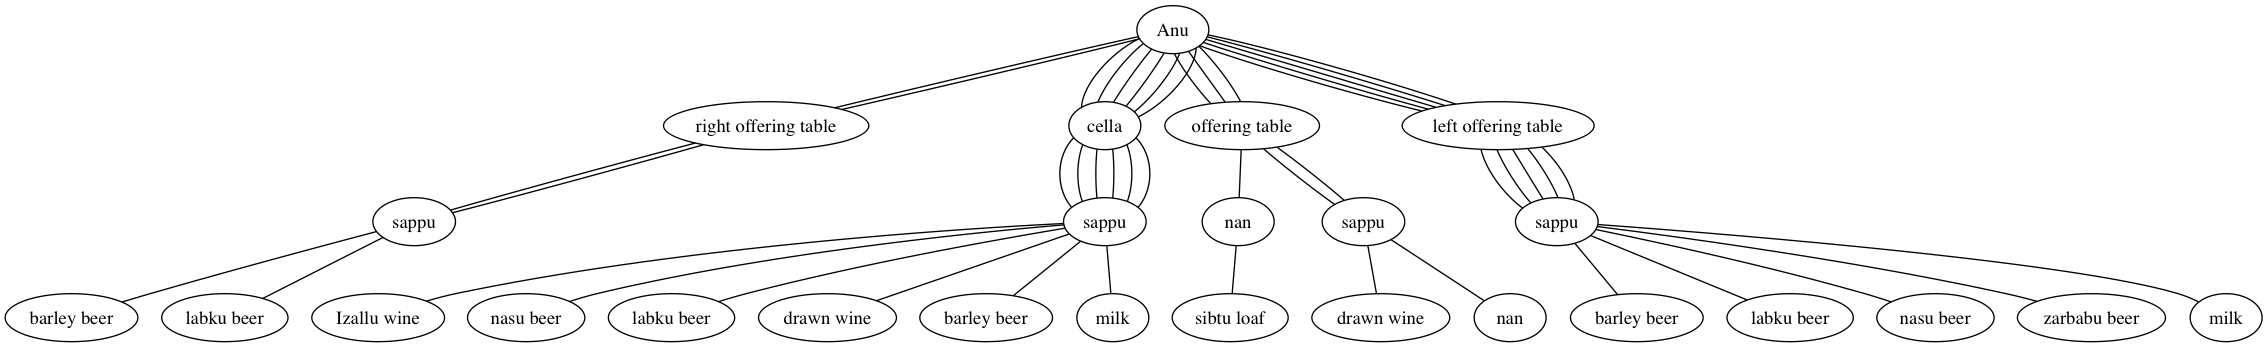

In [26]:
# the difference between this tree and the last one is 'strict=False'
# this allows a line for each edge, adding weight to the connection
B = PG.AGraph(strict=False)

for x in label_dictionary.keys():
    B.add_node(x, label=label_dictionary[x])

count = 0
while count < permutations.num_columns-1:
    permutations.apply((lambda x,y: B.add_edge(x, y)), [count,count+1])
    count += 1
    
B.write('ademo.dot')
B.layout(prog='dot')
B.draw('file.png')
Image('file.png')

/Users/ronaldwalker/anaconda/lib/python3.5/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


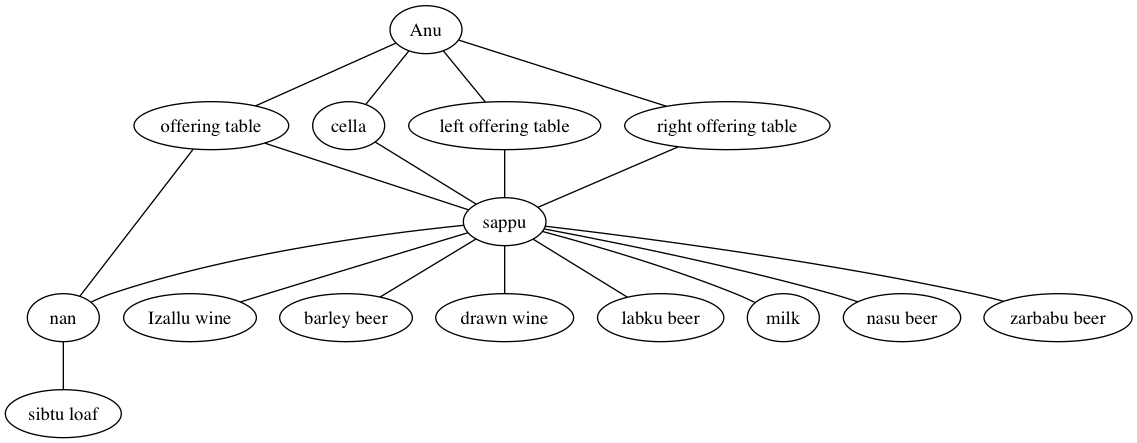

In [75]:
# this tree shows all of the possbile connections that each level has
# only a level to level display, does not show relationships beyond the adjacent node
B = PG.AGraph()

row = 0
while row < permutations.num_rows:
    count = 0
    while count < permutations.num_columns-1:
        original.apply((lambda x,y: B.add_edge(x, y)), [count,count+1])
        count += 1
    row+=1
    
B.write('ademo.dot')
B.layout(prog='dot')
B.draw('file.png')
Image('file.png')